# Multiple Linear Regression - Bike Sharing Assigment

## Problem Statement
A US bike-sharing provider BoomBikes has gathered a dataset 'day.csv' on daily bike demands across the American market and wants to know 
<ul><li>Which variables are significant in predicting the demand for shared bikes.</li>
<li>How well those variables describe the bike demands</li></ul>
</br>
We need to model the demand for shared bikes with the available independent variables, so that the company can use it to understand how exactly the demands vary with different features and accordingly manipulate the business strategy to meet the demand levels. Further, the model will be a good way for the company to understand the demand dynamics of a new market. 
</br></br>
The model should be built taking 'cnt' as the target variable from the dataset.

## Approach
Since the target variable is known, we will go with a supervised machine learning model and since it is a continuous variable, we will go with linear regression model. 


## Step 1: Exploratory Data Analysis (EDA)

### Load and Inspect Data

In [123]:
# Import needed libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [124]:
# Load the data and check how it looks like
df_bike = pd.read_csv('day.csv')
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### NOTE: 
The variable '<b>cnt</b>' here represents the bike demand and so is the <b>target variable.</b>
<br/>The sum of variables 'casual' and 'registered' are equal to 'cnt'.

In [125]:
# Check the number of rows and columns
df_bike.shape # Total 730 rows and 16 columns

(730, 16)

In [126]:
# Check on the numerical variables
df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<b>Observation:</b> Looking at the max, min and 50%, none of the variables have outliers. We will confirm this later with boxplots

### Data Cleaning

#### Check missing values

In [127]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<b>Observation</b>: All the columns have 730 non-null records which is also equal to the total number of rows. This confirms that there are no missing values.
<br/> We can also confirm that with isnull() method below.

In [128]:
df_bike.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### Check NA values

In [129]:
df_bike.isna().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

<b>Observation</b>: There are no NA values

#### Check variables which have same values for all rows

In [130]:
df_bike.nunique().sort_values().head(10)

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
dtype: int64

<b>Observation</b>: There are no variables with same values for all rows

#### Check if there are any duplicate rows

In [131]:
df_bike.duplicated().mean()

0.0

<b>Observation</b>: There are no duplicate rows

#### Remove irrelevant variables
Since 'casual' and 'registered' variables add upto 'cnt', they can be dropped.
<br/>'instant' is an id column which be dropped as well.
</br> Since we have year and month from 'dteday' in other variables, we can drop dteday as well.

In [132]:
irrelevant_columns = ['casual', 'registered', 'instant', 'dteday']
df_bike = df_bike.drop(irrelevant_columns, axis=1)
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Rename columns, if required

In [133]:
# Renaming a few columns for better readability
df_bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

#### Map categorical variables' values
Map categorical variables' values with meaningful strings from data dictionary

In [134]:
df_bike.season = df_bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df_bike.month = df_bike.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df_bike.weekday = df_bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df_bike.weathersit = df_bike.weathersit.map({1:'clear',2:'misty',3:'light_rain',4:'heavy_rain'})
df_bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### Visualizing Data
Let's visualize the data using matplotlib and seaborn libraries

In [135]:
import matplotlib.pyplot as plt
import seaborn as sb

#### Visualizing continuous variables
We can use pairplot to visualize numerical variables

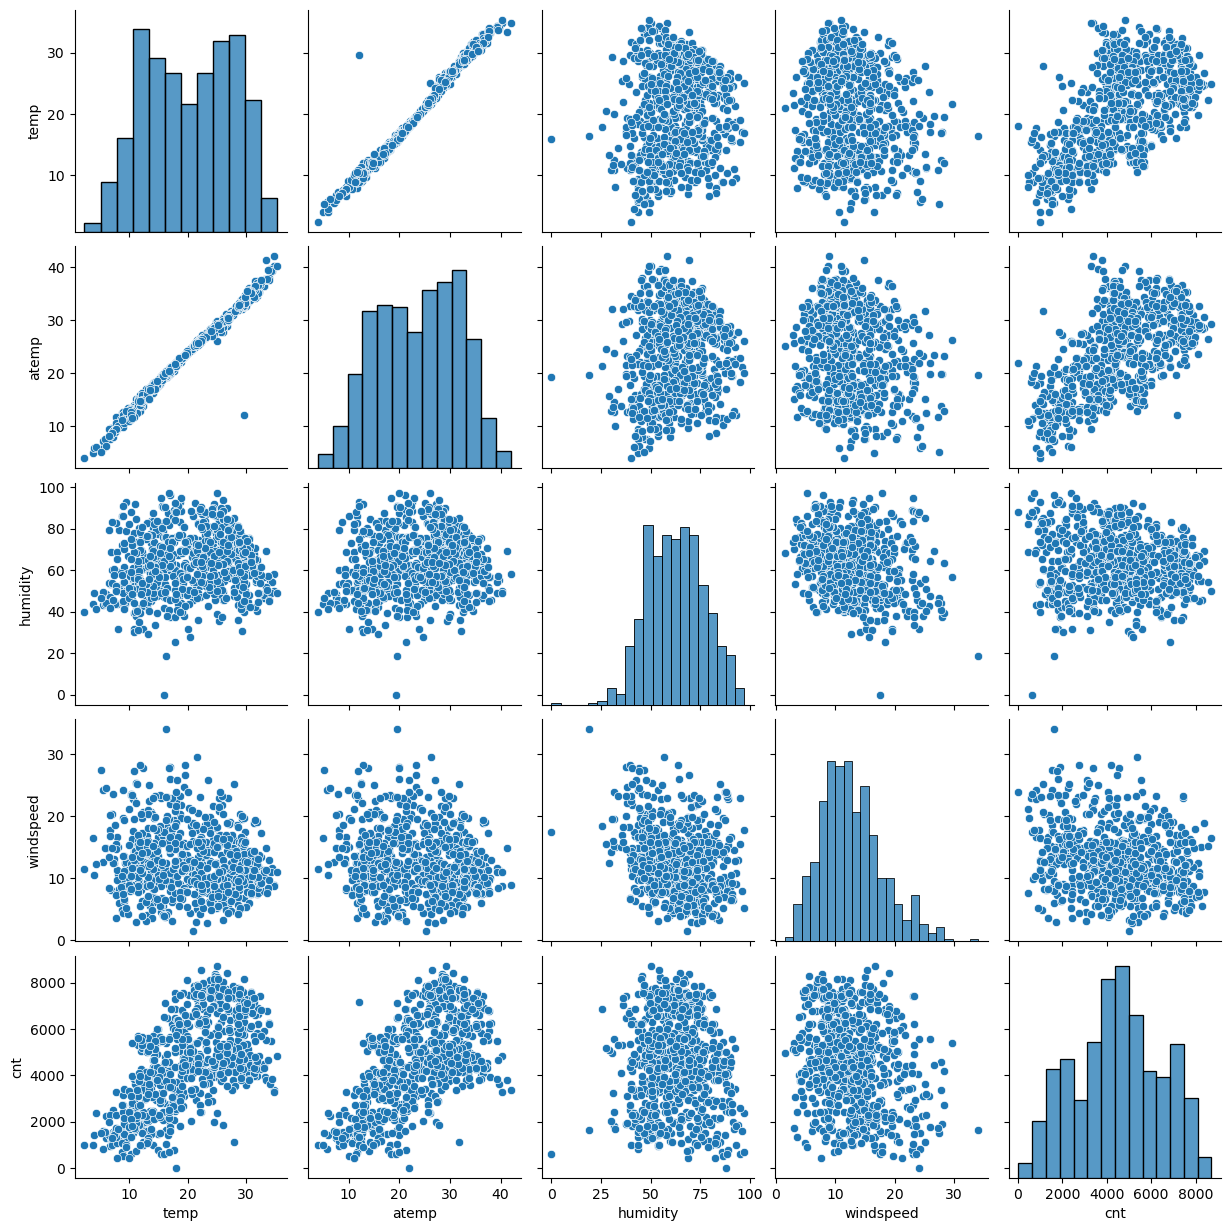

In [136]:
num_vars = ['temp','atemp','humidity','windspeed','cnt']
sb.pairplot(df_bike[num_vars])

**Observation:**
<br/>It looks like there is a multicollinearity between 'temp' and 'atemp' variables. We can decide which one to keep later during model building

#### Visualizing Categorical Variables
There are some categorical variables as well. Lets use boxplot to visualize how these variables look against the predictor variable

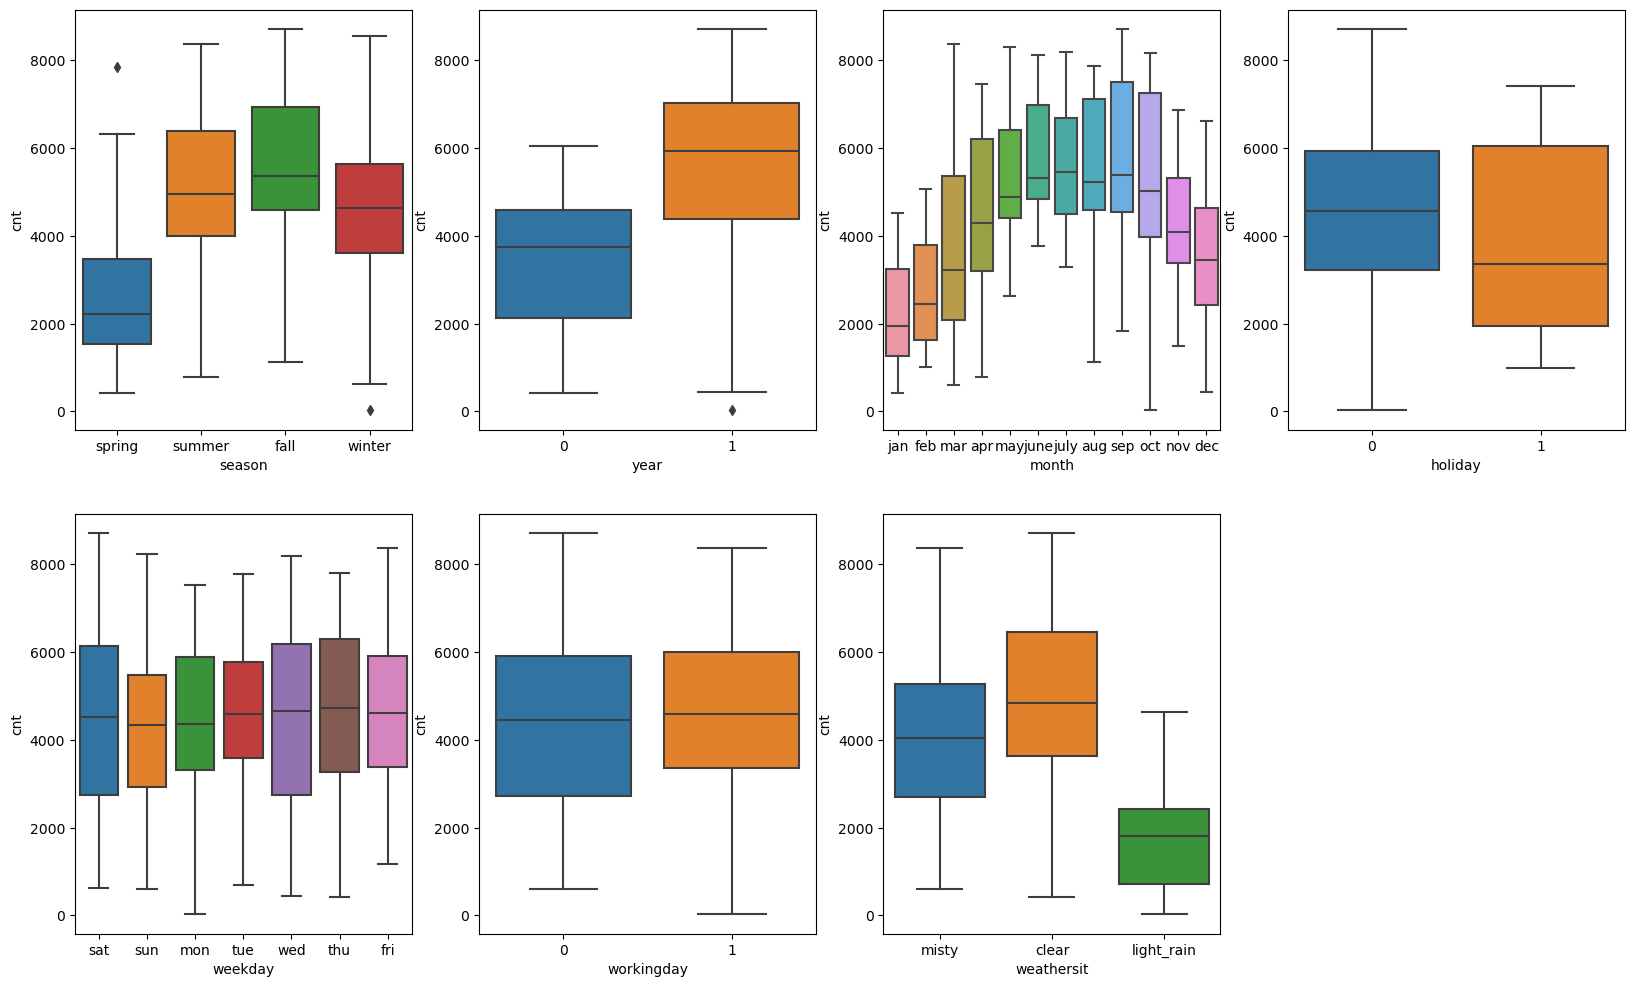

In [137]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sb.boxplot(x = 'season', y = 'cnt', data = df_bike)
plt.subplot(2,4,2)
sb.boxplot(x = 'year', y = 'cnt', data = df_bike)
plt.subplot(2,4,3)
sb.boxplot(x = 'month', y = 'cnt', data = df_bike)
plt.subplot(2,4,4)
sb.boxplot(x = 'holiday', y = 'cnt', data = df_bike)
plt.subplot(2,4,5)
sb.boxplot(x = 'weekday', y = 'cnt', data = df_bike)
plt.subplot(2,4,6)
sb.boxplot(x = 'workingday', y = 'cnt', data = df_bike)
plt.subplot(2,4,7)
sb.boxplot(x = 'weathersit', y = 'cnt', data = df_bike)
plt.show()

**Observations:**
<br/> There are more number of bookings between the months of may and oct.
<br/> The variables season and weather seem to have good impact on the demand.
<br/> The year 2019 seem to have attracted more demands than the year 2018

### Checking heatmaps

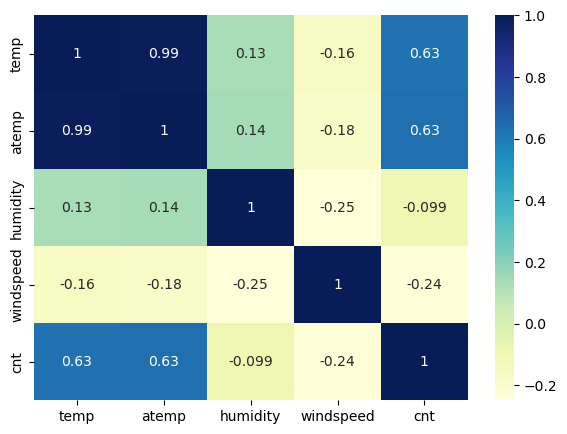

In [138]:
# Since we already have numerical variables in num_vars, we can use that here
plt.figure(figsize=(7, 5))
sb.heatmap(df_bike[num_vars].corr(), annot=True, cmap='YlGnBu')
plt.title = "Correlation between numerical variables"
plt.show()

**Observations:**
<br/> As observed earlier, there seem to be a strong correlation between 'temp' and 'atemp' indicating multicollinearity

## Step 2: Data Preparation

### Encode categorical variables
We need to generate dummy variables for categorical variables 'season', 'month', 'weekday', 'weathersit'

In [139]:
# Generate dummies for the 4 mentioned variables
df_season=pd.get_dummies(df_bike.season,drop_first=True)
df_month=pd.get_dummies(df_bike.month,drop_first=True)
df_weekday=pd.get_dummies(df_bike.weekday,drop_first=True)
df_weathersit=pd.get_dummies(df_bike.weathersit,drop_first=True)

# Concat these dummies to the main dataframe
df_bike = pd.concat([df_bike, df_season, df_month, df_weekday, df_weathersit], axis=1)

# Drop the original categorical variables
cat_vars = ['season', 'month', 'weekday', 'weathersit']
df_bike.drop(cat_vars, axis=1, inplace=True)

# View the dataframe now
df_bike.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light_rain,misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [140]:
df_bike.shape

(730, 30)

### Split the dataset into train and test sets

In [141]:
# Import the libaray needed
from sklearn.model_selection import train_test_split

# Split with 70-30 ration
df_train, df_test = train_test_split(df_bike, train_size=0.7, random_state=100)
df_train.shape

(510, 30)

### Rescale the variables

In [142]:
# Import the needed library
from sklearn.preprocessing import MinMaxScaler

# We already have numerical variables in num_vars
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

# Confirming rescale
df_train[num_vars].describe()

,temp,atemp,humidity,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 2: Building a linear model

### Create X_train and y_train

In [143]:
y_train = df_train.pop('cnt')
X_train = df_train
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

### Build a linear model
Lets create a model with all variables first.
<br/> We can then use automated RFE method to reduce it to 15 variables.
<br/> We can then follow manual approach to remove variables one by one.
<br/> - The logic for dropping variable manually is to look at p-value first and then to look for VIF

##### Create a model with all variables first

In [144]:
# Import the needed libraries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Create a model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

##### Use RFE method to reduce the variables to 15

In [145]:
# Run RFE
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)
selected_vars = X_train.columns[rfe.support_]
selected_vars

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'summer', 'winter', 'aug', 'jan', 'sep', 'sat', 'sun', 'light_rain',
       'misty'],
      dtype='object')

In [148]:
X_train_reduced = X_train[selected_vars]
X_train_reduced.head()

,year,holiday,workingday,temp,humidity,windspeed,summer,winter,aug,jan,sep,sat,sun,light_rain,misty
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,0,1,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,1,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,0,1


##### Build a model (StatsModels) with RFE selected columns

In [149]:
# Import the needed library
import statsmodels.api as sm

# Let's build a model with selected columns from RFE
X_train_sm = sm.add_constant(X_train_reduced)
lr = sm.OLS(y_train, X_train_sm)
lrmodel = lr.fit()
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          1.01e-191
Time:                        00:08:22   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1727      0.023      7.601      0.000       0.128       0.217
year           0.2299      0.008     28.744      0.000       0.214       0.246
holiday       -0.0233      0.021     -1.123      0.262      -0.064       0.017
workingday     0.0768      0.009      8.650      0.000       0.059       0.094
temp           0.5156      0.024     21.197      0.000       0.468       0.563
humidity      -0.1603      0.037     -4.329      0.000      -0.233      -0.088
windspeed     -0.1879      0.025     -7.411      0.000      -0.238      -0.138
summer         0.0967      0.011      8.705      0.000       0.075       0.119
winter         0.1375      0.011     11.978      0.000       0.115       0.160
aug            0.0504      0.016      3.133      0.002       0.019       0.082
jan           -0.0374      0.017     -2.164      0.031      -0.071      -0.003
sep            0.1170      0.016      7.317      0.000       0.086       0.148
sat            0.0858      0.011      7.789      0.000       0.064       0.107
sun            0.0334      0.012      2.878      0.004       0.011       0.056
light_rain    -0.2449      0.026     -9.423      0.000      -0.296      -0.194
misty         -0.0565      0.010     -5.455      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       63.744   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.444
Skew:                          -0.663   Prob(JB):                     3.54e-33
Kurtosis:                       5.296   Cond. No.                     1.42e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.43e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [150]:
# Import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a method for calculating VIF
def calculate_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

calculate_vif(X_train_reduced)

,Features,VIF
2,workingday,34.00
11,sat,8.38
12,sun,8.20
1,holiday,2.24
3,temp,1.94
4,humidity,1.88
7,winter,1.58
14,misty,1.56
9,jan,1.55
6,summer,1.48


##### Drop variable #1
The variable 'holiday' has a P value of 0.262. Dropping it and rebuilding the model

In [151]:
# Drop variable 'holiday'
X_train_reduced = X_train_reduced.drop('holiday', axis=1)

# Let's build a model with selected columns from RFE
X_train_sm = sm.add_constant(X_train_reduced)
lr = sm.OLS(y_train, X_train_sm)
lrmodel = lr.fit()
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          1.01e-191
Time:                        00:09:29   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1493      0.037      4.049      0.000       0.077       0.222
year           0.2299      0.008     28.744      0.000       0.214       0.246
workingday     0.1002      0.025      3.954      0.000       0.050       0.150
temp           0.5156      0.024     21.197      0.000       0.468       0.563
humidity      -0.1603      0.037     -4.329      0.000      -0.233      -0.088
windspeed     -0.1879      0.025     -7.411      0.000      -0.238      -0.138
summer         0.0967      0.011      8.705      0.000       0.075       0.119
winter         0.1375      0.011     11.978      0.000       0.115       0.160
aug            0.0504      0.016      3.133      0.002       0.019       0.082
jan           -0.0374      0.017     -2.164      0.031      -0.071      -0.003
sep            0.1170      0.016      7.317      0.000       0.086       0.148
sat            0.1091      0.027      4.077      0.000       0.057       0.162
sun            0.0567      0.027      2.108      0.036       0.004       0.110
light_rain    -0.2449      0.026     -9.423      0.000      -0.296      -0.194
misty         -0.0565      0.010     -5.455      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       63.744   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.444
Skew:                          -0.663   Prob(JB):                     3.54e-33
Kurtosis:                       5.296   Cond. No.                         23.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
# Calculate VIF now
calculate_vif(X_train_reduced)

,Features,VIF
3,humidity,27.03
1,workingday,16.02
2,temp,12.26
4,windspeed,4.35
10,sat,4.35
11,sun,4.25
13,misty,2.22
0,year,2.07
6,winter,2.06
5,summer,1.97


##### Drop variable #2
P value for all variable looks good now. 
<br/>Lets remove the variable humidity which is having a VIF of 27.03 and rebuild the model

In [153]:
# Drop variable 'holiday'
X_train_reduced = X_train_reduced.drop('humidity', axis=1)

# Let's build a model with selected columns from RFE
X_train_sm = sm.add_constant(X_train_reduced)
lr = sm.OLS(y_train, X_train_sm)
lrmodel = lr.fit()
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.8
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          6.55e-189
Time:                        00:19:23   Log-Likelihood:                 508.90
No. Observations:                 510   AIC:                            -989.8
Df Residuals:                     496   BIC:                            -930.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0600      0.031      1.929      0.054      -0.001       0.121
year           0.2336      0.008     28.879      0.000       0.218       0.250
workingday     0.1014      0.026      3.933      0.000       0.051       0.152
temp           0.4920      0.024     20.393      0.000       0.445       0.539
windspeed     -0.1583      0.025     -6.372      0.000      -0.207      -0.110
summer         0.0931      0.011      8.256      0.000       0.071       0.115
winter         0.1270      0.011     11.121      0.000       0.105       0.149
aug            0.0487      0.016      2.980      0.003       0.017       0.081
jan           -0.0431      0.018     -2.458      0.014      -0.078      -0.009
sep            0.1109      0.016      6.843      0.000       0.079       0.143
sat            0.1123      0.027      4.122      0.000       0.059       0.166
sun            0.0549      0.027      2.004      0.046       0.001       0.109
light_rain    -0.2889      0.024    -11.871      0.000      -0.337      -0.241
misty         -0.0820      0.009     -9.475      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       62.535   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.370
Skew:                          -0.654   Prob(JB):                     2.71e-32
Kurtosis:                       5.265   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
# Calculate VIF now
calculate_vif(X_train_reduced)

,Features,VIF
1,workingday,10.87
2,temp,9.88
3,windspeed,4.35
9,sat,3.25
10,sun,3.04
0,year,2.06
4,summer,1.94
5,winter,1.80
6,aug,1.60
12,misty,1.60


##### Drop variable #3
P value for all variable looks good now. 
<br/>Lets remove the variable 'workingday' which is having a VIF of 10.87 and rebuild the model

In [155]:
# Drop variable 'holiday'
X_train_reduced = X_train_reduced.drop('workingday', axis=1)

# Let's build a model with selected columns from RFE
X_train_sm = sm.add_constant(X_train_reduced)
lr = sm.OLS(y_train, X_train_sm)
lrmodel = lr.fit()
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          8.65e-187
Time:                        00:20:25   Log-Likelihood:                 501.07
No. Observations:                 510   AIC:                            -976.1
Df Residuals:                     497   BIC:                            -921.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1558      0.020      7.926      0.000       0.117       0.194
year           0.2341      0.008     28.520      0.000       0.218       0.250
temp           0.4954      0.024     20.255      0.000       0.447       0.544
windspeed     -0.1608      0.025     -6.381      0.000      -0.210      -0.111
summer         0.0947      0.011      8.290      0.000       0.072       0.117
winter         0.1255      0.012     10.846      0.000       0.103       0.148
aug            0.0504      0.017      3.036      0.003       0.018       0.083
jan           -0.0441      0.018     -2.479      0.014      -0.079      -0.009
sep            0.1080      0.016      6.578      0.000       0.076       0.140
sat            0.0148      0.011      1.289      0.198      -0.008       0.037
sun           -0.0425      0.012     -3.592      0.000      -0.066      -0.019
light_rain    -0.2841      0.025    -11.524      0.000      -0.333      -0.236
misty         -0.0802      0.009     -9.146      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       75.413   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.337
Skew:                          -0.757   Prob(JB):                     2.09e-41
Kurtosis:                       5.555   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
# Calculate VIF now
calculate_vif(X_train_reduced)

,Features,VIF
1,temp,5.17
2,windspeed,3.40
0,year,2.04
3,summer,1.89
5,aug,1.60
4,winter,1.56
11,misty,1.54
7,sep,1.31
6,jan,1.23
8,sat,1.21


##### Drop variable #4
P value for all variable looks good. 
<br/>Lets remove the variable 'temp' which is having a VIF of 5.17 and rebuild the model

In [157]:
# Drop variable 'holiday'
X_train_reduced = X_train_reduced.drop('temp', axis=1)

# Let's build a model with selected columns from RFE
X_train_sm = sm.add_constant(X_train_reduced)
lr = sm.OLS(y_train, X_train_sm)
lrmodel = lr.fit()
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     106.6
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          3.05e-123
Time:                        00:21:29   Log-Likelihood:                 347.60
No. Observations:                 510   AIC:                            -671.2
Df Residuals:                     498   BIC:                            -620.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4589      0.017     26.692      0.000       0.425       0.493
year           0.2509      0.011     22.770      0.000       0.229       0.273
windspeed     -0.2638      0.033     -7.917      0.000      -0.329      -0.198
summer         0.1180      0.015      7.690      0.000       0.088       0.148
winter         0.0674      0.015      4.454      0.000       0.038       0.097
aug            0.1711      0.021      8.189      0.000       0.130       0.212
jan           -0.2072      0.021     -9.674      0.000      -0.249      -0.165
sep            0.1883      0.022      8.751      0.000       0.146       0.231
sat            0.0091      0.015      0.588      0.557      -0.021       0.039
sun           -0.0422      0.016     -2.643      0.008      -0.074      -0.011
light_rain    -0.2898      0.033     -8.709      0.000      -0.355      -0.224
misty         -0.0988      0.012     -8.392      0.000      -0.122      -0.076
==============================================================================
Omnibus:                       11.400   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.817
Skew:                          -0.252   Prob(JB):                     0.000999
Kurtosis:                       3.630   Cond. No.                         8.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
# Calculate VIF now
calculate_vif(X_train_reduced)

,Features,VIF
1,windspeed,2.73
0,year,1.84
2,summer,1.64
10,misty,1.53
3,winter,1.50
5,jan,1.22
7,sat,1.21
4,aug,1.20
8,sun,1.18
6,sep,1.11


##### Drop variable #5
The variable 'sat' is having a high p-value. Lets remove it and rebuild the model

In [160]:
# Drop variable 'holiday'
X_train_reduced = X_train_reduced.drop('sat', axis=1)

# Let's build a model with selected columns from RFE
X_train_sm = sm.add_constant(X_train_reduced)
lr = sm.OLS(y_train, X_train_sm)
lrmodel = lr.fit()
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     117.4
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          3.25e-124
Time:                        00:23:15   Log-Likelihood:                 347.43
No. Observations:                 510   AIC:                            -672.9
Df Residuals:                     499   BIC:                            -626.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4602      0.017     27.027      0.000       0.427       0.494
year           0.2507      0.011     22.778      0.000       0.229       0.272
windspeed     -0.2628      0.033     -7.903      0.000      -0.328      -0.197
summer         0.1179      0.015      7.690      0.000       0.088       0.148
winter         0.0677      0.015      4.475      0.000       0.038       0.097
aug            0.1713      0.021      8.204      0.000       0.130       0.212
jan           -0.2069      0.021     -9.670      0.000      -0.249      -0.165
sep            0.1882      0.022      8.754      0.000       0.146       0.230
sun           -0.0439      0.016     -2.790      0.005      -0.075      -0.013
light_rain    -0.2897      0.033     -8.711      0.000      -0.355      -0.224
misty         -0.0988      0.012     -8.397      0.000      -0.122      -0.076
==============================================================================
Omnibus:                       11.073   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               13.578
Skew:                          -0.241   Prob(JB):                      0.00113
Kurtosis:                       3.638   Cond. No.                         8.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
# Calculate VIF now
calculate_vif(X_train_reduced)

,Features,VIF
1,windspeed,2.63
0,year,1.84
2,summer,1.63
9,misty,1.53
3,winter,1.48
5,jan,1.21
4,aug,1.19
7,sun,1.15
6,sep,1.11
8,light_rain,1.08


##### Finalize model
Now the P-value for all variables are well within acceptable range which means they are all significant. 
<br/> Looking at the VIF, we can also confirm that the dependant variables have very low collinearity between them.
<br/> R-squared score of 70% is a pretty decent score indicating good predicting power of the model.
<br/>
<br/> Let's go ahead and use this model for predictions.


## Step 4: Residual Analysis and Prediction on test set

##### Create residuals and analyze

Text(0.5, 0.98, 'Error Terms')

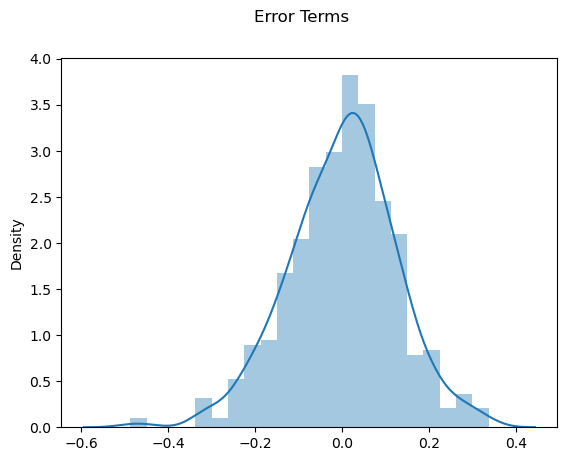

In [171]:
# Predict on the train set and get residuals
y_train_pred = lrmodel.predict(X_train_sm)
res = y_train - y_train_pred

# Plot the distribution of residuals
fig = plt.figure()
sb.distplot(res)
fig.suptitle('Error Terms')

**Residual Analysis**
<br/> Error terms are following a normal distribution with mean 0. This confirms the error terms assumptions of linear regression.

## Step 5: Make predictions on the test set

##### Rescale on the test set

In [172]:
# Transform the test set
df_test[num_vars] = scaler.transform(df_test[num_vars])

# Confirm the rescaling
df_test[num_vars].describe()

,temp,atemp,humidity,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.558172,0.544652,0.625590,0.300126,0.524678
75%,0.755981,0.713308,0.743798,0.402718,0.677750
max,0.984424,0.980934,1.002146,0.807474,0.963300


##### Create X_test and y_test

In [173]:
y_test = df_test.pop('cnt')
X_test = df_test
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [175]:
# Get only the finalized variables from X_test
X_test_reduced = X_test[X_train_reduced.columns]

# Add constant and predict
X_test_sm = sm.add_constant(X_test_reduced)
y_test_pred = lrmodel.predict(X_test_sm)
y_test_pred.head()

184    0.333344
535    0.781750
299    0.334536
221    0.537174
152    0.430361
dtype: float64

## Step 6: Evaluate the model

##### Get R-square value on the test set

In [178]:
# Import the needed library
from sklearn.metrics import r2_score

# Get R-squared score
r2score = r2_score(y_true=y_test, y_pred=y_test_pred)
round(r2score, 4)

0.563

##### Observataion:
The R2 on the test set is 56%, whereas the R2 on the training set in 70.
The model is able to generalize decently on the test.

##### Actual vs Predicted on the test set

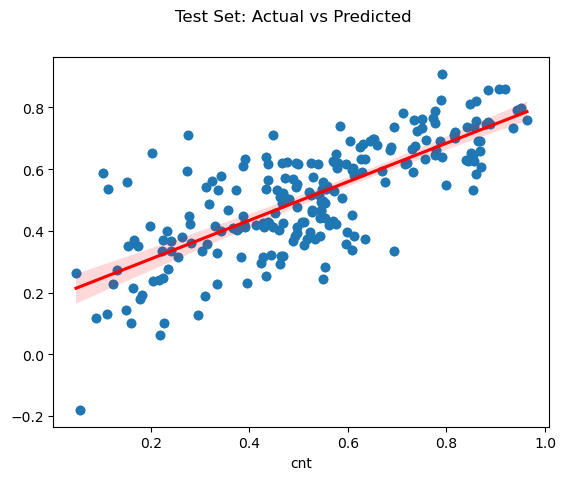

In [189]:
# Plot the original test set against the predicted one
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('Test Set: Actual vs Predicted') 
plt.xlabel('Test Set Actual')
plt.ylabel('Test Set Predicted') 
#sb.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sb.regplot(x=y_test, y=y_test_pred, line_kws={"color": "red"})
plt.show()

##### Conclusion

In [193]:
round(lrmodel.params, 2)

const         0.45
year          0.25
windspeed    -0.26
summer        0.12
winter        0.07
aug           0.17
jan          -0.21
sep           0.19
light_rain   -0.29
misty        -0.10
dtype: float64

The equation for the best fitted line is:

$ cnt = 0.45 + 0.25  \times  year - 0.26  \times  windspeed + 0.12 \times summer + 0.07 \times winter + 0.17 \times aug - 0.21 \times jan + 0.19 \times sep - 0.29 \times light_rain - 0.10 \times misty $

Overall we have a decent model, but we also acknowledge that we could do better. 

We have a couple of options:
1. Add new features (bathrooms/bedrooms, area/stories, etc.)
2. Build a non-linear model